In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
from datasets import CustomCIFAR10 as CIFAR10_dataset

In [3]:
from consts import *

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize(cifar10_mean, cifar10_std)
    ])
batch_size = 4

In [6]:
trainset= CIFAR10_dataset("../data/", transform=transform, train = True)
testset= CIFAR10_dataset("../data/", transform=transform, train = False)

In [7]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset,batch_size=1, shuffle=False)

In [8]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

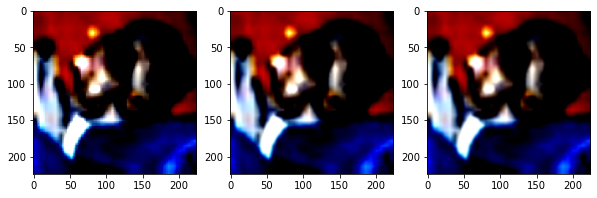

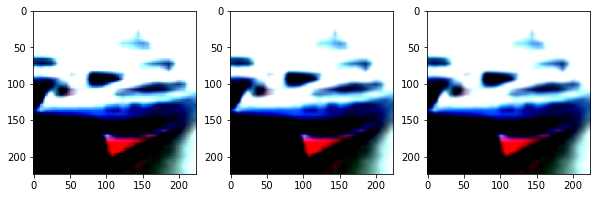

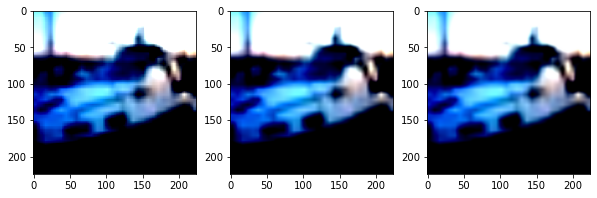

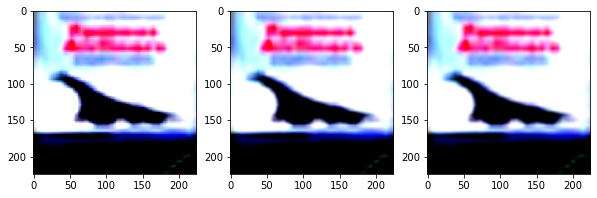

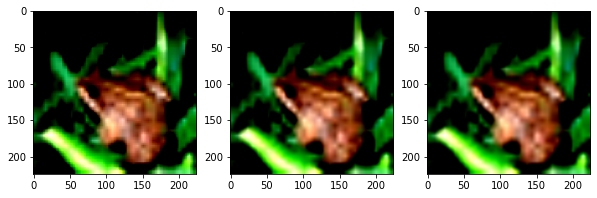

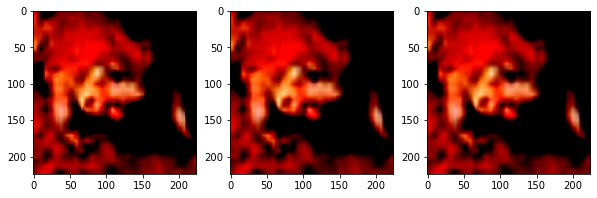

In [9]:
for i,(inputs,out,idx) in enumerate(testloader):
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
        ax.imshow(torch.permute(inputs[0],(1,2,0)),interpolation=interp)
    if i == 5: 
       break

In [10]:
torch.hub.set_dir('/mnt/DONNEES/hbrachemi/.cache/torch/hub/checkpoints/')

In [11]:
from victim_model import *

In [12]:
model_ft= VictimModel("vgg16",True,10)

In [13]:
from utils import *

In [14]:
hyperparametters = {}
hyperparametters["sigma"]=0.1
hyperparametters["lambda"]=1
hyperparametters["criterion"] = torch.nn.CrossEntropyLoss()
hyperparametters["sponge_optimizer"] = torch.optim.Adam(model_ft.model.parameters(), lr=0.001)
hyperparametters["num_sponge_epochs"] = 10
hyperparametters["sponge_criterion"] = "l0"
hyperparametters["num_epochs"] = 35
hyperparametters["criterion"] = torch.nn.CrossEntropyLoss()
hyperparametters["optimizer"] = torch.optim.Adam(model_ft.model.parameters(), lr=0.0001)


In [15]:
from torch.utils.tensorboard import SummaryWriter

In [16]:
writer = SummaryWriter()

In [17]:
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')

In [19]:
model_ft.model.features.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [ ]:
a = model_ft.train({"train":trainloader,"val":testloader},hyperparametters,writer=writer)

 88%|████████▊ | 11018/12500 [13:37<01:50, 13.36it/s]

In [25]:
a = model_ft.evaluate(testloader)

100%|██████████| 10000/10000 [00:26<00:00, 371.85it/s]


In [26]:
a

{'accuracy': 0.8563,
 'energy': {'avg_case_cons': [tensor(2.6327e+11),
   tensor(2.6326e+11),
   tensor(2.6328e+11),
   tensor(2.6325e+11),
   tensor(2.6322e+11),
   tensor(2.6325e+11),
   tensor(2.6327e+11),
   tensor(2.6324e+11),
   tensor(2.6325e+11),
   tensor(2.6326e+11),
   tensor(2.6328e+11),
   tensor(2.6325e+11),
   tensor(2.6326e+11),
   tensor(2.6329e+11),
   tensor(2.6325e+11),
   tensor(2.6323e+11),
   tensor(2.6327e+11),
   tensor(2.6324e+11),
   tensor(2.6329e+11),
   tensor(2.6325e+11),
   tensor(2.6323e+11),
   tensor(2.6327e+11),
   tensor(2.6333e+11),
   tensor(2.6325e+11),
   tensor(2.6321e+11),
   tensor(2.6324e+11),
   tensor(2.6326e+11),
   tensor(2.6323e+11),
   tensor(2.6325e+11),
   tensor(2.6324e+11),
   tensor(2.6327e+11),
   tensor(2.6325e+11),
   tensor(2.6324e+11),
   tensor(2.6326e+11),
   tensor(2.6328e+11),
   tensor(2.6327e+11),
   tensor(2.6324e+11),
   tensor(2.6324e+11),
   tensor(2.6325e+11),
   tensor(2.6330e+11),
   tensor(2.6324e+11),
   tensor

In [ ]:
p_ids = [random.randint(1,10000) for _ in range(100)]

In [ ]:
torch.multiprocessing.set_sharing_strategy('file_system')

In [ ]:
stats = dict()
dataloaders= {"train":trainloader,"val":testloader}

a = model_ft.sponge_train(dataloaders,
                          p_ids,
                          hyperparametters,
                          stats,
                          writer)

In [20]:
a = model_ft.evaluate(testloader)

100%|██████████| 10000/10000 [00:52<00:00, 189.55it/s]


In [29]:
for i, (inputs,labels) in enumerate testloader:
    

0.80188125

In [24]:
np.mean(a["energy"])

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

In [17]:
import random

In [ ]:
from consts import BENCHMARK
from utils import *

torch.backends.cudnn.benchmark = BENCHMARK

def data_sponge_loss(model, x, victim_leaf_nodes, args):
    sponge_stats = SpongeMeter(args)

    def register_stats_hook(model, input, output):
        sponge_stats.register_output_stats(output)

    hooks = register_hooks(victim_leaf_nodes, register_stats_hook)

    outputs = model(x)

    sponge_loss = fired_perc = fired = l2 = 0
    for i in range(len(sponge_stats.loss)):
        sponge_loss += sponge_stats.loss[i].to('cuda')
        fired += float(sponge_stats.fired[i])
        fired_perc += float(sponge_stats.fired_perc[i])
        l2 += float(sponge_stats.l2[i])
    remove_hooks(hooks)

    sponge_loss /= len(sponge_stats.loss)
    fired_perc /= len(sponge_stats.loss)

    return sponge_loss, outputs, (float(sponge_loss), fired, fired_perc, l2)


In [ ]:
from energy_estimation import check_sourceset_consumption

In [ ]:
def data_sponge_loss(model, x, victim_leaf_nodes, args):
    sponge_stats = SpongeMeter(args)

    def register_stats_hook(model, input, output):
        sponge_stats.register_output_stats(output)

    hooks = register_hooks(victim_leaf_nodes, register_stats_hook)

    outputs = model(x)

    sponge_loss = fired_perc = fired = l2 = 0
    for i in range(len(sponge_stats.loss)):
        sponge_loss += sponge_stats.loss[i].to('cuda')
        fired += float(sponge_stats.fired[i])
        fired_perc += float(sponge_stats.fired_perc[i])
        l2 += float(sponge_stats.l2[i])
    remove_hooks(hooks)

    sponge_loss /= len(sponge_stats.loss)
    fired_perc /= len(sponge_stats.loss)

    return sponge_loss, outputs, (float(sponge_loss), fired, fired_perc, l2)

def sponge_step_loss(model, inputs, victim_leaf_nodes, args):
    sponge_loss, _, sponge_stats = data_sponge_loss(model, inputs, victim_leaf_nodes, args)
    sponge_stats = dict(sponge_loss=float(sponge_loss), sponge_stats=sponge_stats)
    return sponge_loss, sponge_stats

In [ ]:
model = model_ft.model

In [16]:
import matplotlib.pyplot as plt

In [17]:
import os

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((224,224)),
  ])
    
batch_size = 4


In [ ]:
trainset= CIFAR10_dataset("../data/cifar-10-batches-py/", transform=transform, phase = "train")
testset= CIFAR10_dataset("../data/cifar-10-batches-py/", transform=transform, phase = "test")
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4, shuffle=True,num_workers=4)
testloader = torch.utils.data.DataLoader(testset,batch_size=1, shuffle=False,num_workers=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


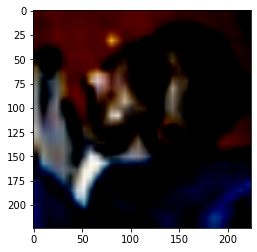